# Regression Discontinuity Design

## Milestone 1: Getting Familiar with The Data

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

### Step 1

In [2]:
rdd_dataset = pd.read_csv("./rdd_data.csv")

### Step 2

In [3]:
rdd_dataset.head()

,spend_1m_baby,spend_2m_baby,spend_3m_baby,spend_4m_baby,spend_5m_baby,spend_6m_baby,spend_1m_clothes,spend_2m_clothes,spend_3m_clothes,spend_4m_clothes,...,spend_4m_eletronic,spend_5m_eletronic,spend_6m_eletronic,sales,discount,profit,age,gender,cust_state,tenure
0,5,0,0,0,10,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1442.30,$ 4.0,66.93,30,0.0,MA,19
1,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,883.96,$ 2.0,41.33,30,1.0,MG,20
2,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,4900.67,$ 224.0,15.88,29,0.0,RJ,21
3,0,0,0,0,0,0.0,25,25.0,0.0,25.0,...,0.0,0.0,0.0,1547.48,$ 1.0,74.99,36,1.0,BA,18
4,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1335.23,$ 13.0,52.41,37,0.0,PB,19


In [4]:
rdd_dataset.dtypes

spend_1m_baby           int64
spend_2m_baby           int64
spend_3m_baby           int64
spend_4m_baby           int64
spend_5m_baby           int64
spend_6m_baby         float64
spend_1m_clothes        int64
spend_2m_clothes      float64
spend_3m_clothes      float64
spend_4m_clothes      float64
spend_5m_clothes      float64
spend_6m_clothes      float64
spend_1m_health         int64
spend_2m_health         int64
spend_3m_health         int64
spend_4m_health         int64
spend_5m_health         int64
spend_6m_health         int64
spend_1m_pet            int64
spend_2m_pet            int64
spend_3m_pet            int64
spend_4m_pet            int64
spend_5m_pet            int64
spend_6m_pet            int64
spend_1m_groceries      int64
spend_2m_groceries      int64
spend_3m_groceries    float64
spend_4m_groceries    float64
spend_5m_groceries    float64
spend_6m_groceries    float64
spend_1m_eletronic      int64
spend_2m_eletronic      int64
spend_3m_eletronic      int64
spend_4m_e

In [5]:
rdd_dataset["discount"] = rdd_dataset["discount"].str.split(" ").str[-1].astype(float)

### Step 3

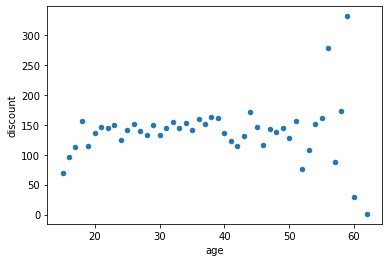

In [6]:
running_var = "age"

group_rdd = (rdd_dataset
             .groupby(running_var)
             .agg({"discount":"mean"})
             .reset_index())

group_rdd.plot.scatter(x=running_var, y="discount");

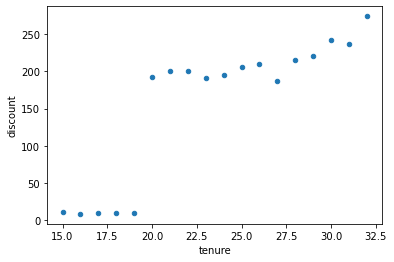

In [7]:
running_var = "tenure"

group_rdd = (rdd_dataset
             .groupby(running_var)
             .agg({"discount":"mean"})
             .reset_index())

group_rdd.plot.scatter(x=running_var, y="discount");

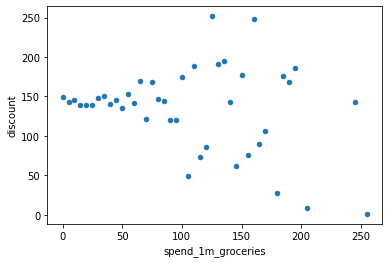

In [8]:
running_var = "spend_1m_groceries"

group_rdd = (rdd_dataset
             .groupby(running_var)
             .agg({"discount":"mean"})
             .reset_index())

group_rdd.plot.scatter(x=running_var, y="discount");

There is a clear discount discontinuity by tenure. It looks like a discount increase at a tenure of 20 months. There isn’t any clear discontinuity in any other variable we’ve looked at. 

### Step 4

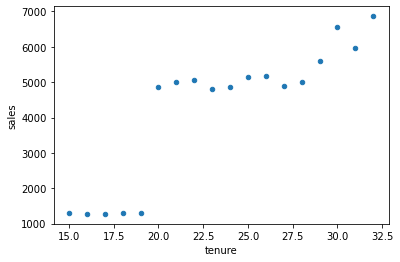

In [9]:
running_var = "tenure"

group_rdd = (rdd_dataset
             .groupby(running_var)
             .agg({"sales":"mean"})
             .reset_index())

group_rdd.plot.scatter(x=running_var, y="sales");

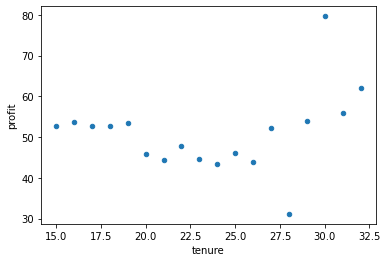

In [10]:
running_var = "tenure"

group_rdd = (rdd_dataset
             .groupby(running_var)
             .agg({"profit":"mean"})
             .reset_index())

group_rdd.plot.scatter(x=running_var, y="profit");

Just like we saw a discontinuity in discount around tenure 20, there is a clear discontinuity in sales. Sales also increase dramatically once customers reach 20 month tenure. This is probably the effect of increasing discounts. On the other hand, when we look at profits, it seems that it decreases at the discontinuity. That is, customers just above tenure 20 are generating less profits than customers just below it. This probably indicates that the effect of discount on profits is negative
 
 
### Step 5


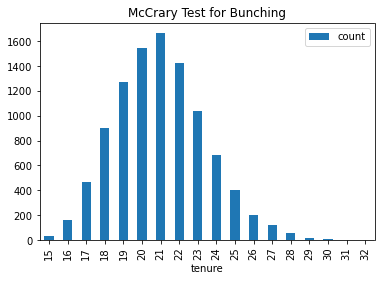

In [11]:
group_rdd = (rdd_dataset
             .assign(count=1)
             .groupby(running_var)
             .agg({"discount":"mean", "count": "sum"})
             .reset_index())

group_rdd.plot.bar(y="count", x="tenure")

plt.title("McCrary Test for Bunching");

There is no evidence of bunching. The histogram is smooth around the 20 month tenure. This is expected, as customers can't manipulate their tenure. 

## Milestone 2 - Regression Discontinuity Design

### Step 1

In [12]:
tresh = 19
rdd_centered = rdd_dataset.assign(tenure=rdd_dataset["tenure"]-tresh)
rdd_centered["above_threshold"] = (rdd_centered["tenure"] > 0).astype(int)

rdd_centered.head()

,spend_1m_baby,spend_2m_baby,spend_3m_baby,spend_4m_baby,spend_5m_baby,spend_6m_baby,spend_1m_clothes,spend_2m_clothes,spend_3m_clothes,spend_4m_clothes,...,spend_5m_eletronic,spend_6m_eletronic,sales,discount,profit,age,gender,cust_state,tenure,above_threshold
0,5,0,0,0,10,0.0,0,0.0,0.0,0.0,...,0.0,0.0,1442.30,4.0,66.93,30,0.0,MA,0,0
1,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,883.96,2.0,41.33,30,1.0,MG,1,1
2,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,4900.67,224.0,15.88,29,0.0,RJ,2,1
3,0,0,0,0,0,0.0,25,25.0,0.0,25.0,...,0.0,0.0,1547.48,1.0,74.99,36,1.0,BA,-1,0
4,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,1335.23,13.0,52.41,37,0.0,PB,0,0


### Step 2

In [13]:
model = smf.ols("discount~tenure*above_threshold", rdd_centered).fit()

model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,10.0302,4.213,2.381,0.017,1.771,18.290
tenure,0.1118,3.263,0.034,0.973,-6.285,6.508
above_threshold,184.7626,5.696,32.436,0.000,173.597,195.928
tenure:above_threshold,0.8269,3.430,0.241,0.809,-5.896,7.550


Fitting a linear regression interacting tenure with the threshold dummy 
 
$$
discount_i = \beta_0 + \beta_1 tenure_i + \beta_2 \mathcal{1}_{tenure>19} + \beta_3 \mathcal{1}_{tenure>19} * threshold_i
$$
 
is equivalent to fitting two regression models: one above and another below the threshold. \\(\beta_0\\) is the intercept for the model below the threshold. \\(\beta_0+\beta_2\\) is the intercept for the model above the threshold. Hence, \\(\beta_2\\) is the jump we have from crossing the threshold. This is exactly the treatment effect we are looking for. 
 
This means that crossing the 20th month threshold increases discount by about `184` (95% CI between 173	and 195). This is a statistically significant difference.

### Step 3

In [14]:
rdd_group_pred = (rdd_centered
                  .groupby("tenure")
                  [["discount","above_threshold"]]
                  .mean()
                  .reset_index())

rdd_group_pred["predictions"] = model.predict(rdd_group_pred)
                


### Step 4

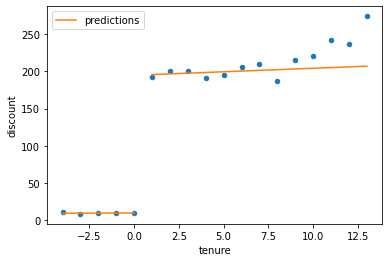

In [15]:

ax = rdd_group_pred.plot.scatter(x="tenure", y="discount", color="C0")
rdd_group_pred.query("above_threshold<=0").plot(x="tenure", y="predictions", ax=ax, color="C1")
rdd_group_pred.query("above_threshold>0").plot(x="tenure", y="predictions", ax=ax, color="C1", legend=False);

### Step 5

In [16]:
model = smf.ols("profit~tenure*above_threshold", rdd_centered).fit()

model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,53.1927,1.208,44.046,0.000,50.825,55.560
tenure,0.1294,0.935,0.138,0.890,-1.704,1.963
above_threshold,-7.6015,1.633,-4.656,0.000,-10.802,-4.401
tenure:above_threshold,-0.1608,0.983,-0.164,0.870,-2.088,1.766


crossing the 20th month threshold decreases profits by about `7.6`. In other words, the impact of discounts on profits is negative. The company is losing money by giving discounts. This is a statistically significant difference. Since crossing the threshold increases discount by about 184 and decreases profits by about 7.6, we should expect each \\\$ spend in discount to decrease profits by about 5 cents.

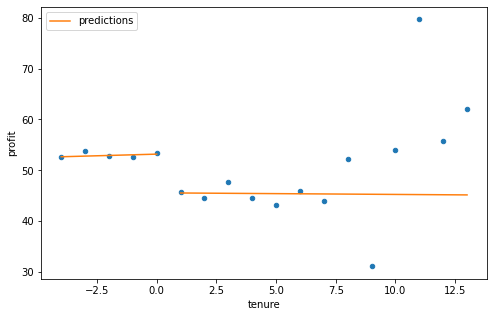

In [17]:
rdd_group_pred = (rdd_centered
                  .groupby("tenure")
                  [["profit","above_threshold"]]
                  .mean()
                  .reset_index())

rdd_group_pred["predictions"] = model.predict(rdd_group_pred)
                

ax = rdd_group_pred.plot.scatter(x="tenure", y="profit", color="C0")
rdd_group_pred.query("above_threshold<=0").plot(x="tenure", y="predictions", ax=ax, color="C1", figsize=(8,5))
rdd_group_pred.query("above_threshold>0").plot(x="tenure", y="predictions", ax=ax, color="C1", legend=False);

## Milestone - 3: Kernel Weights for Better Extrapolation

### Step 1

In [18]:
def kernel(R, c, h):
    indicator = (np.abs(R-c) <= h).astype(float)
    return indicator * (1 - np.abs(R-c)/h)


kernel(np.array([1,2,3,4,5]), c=3, h=2)

array([0. , 0.5, 1. , 0.5, 0. ])

### Step 2

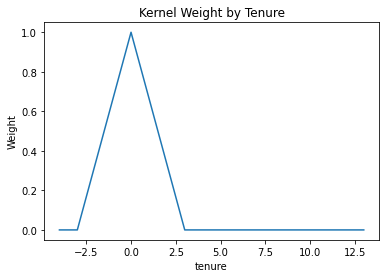

In [19]:
all_tenures  = np.array(sorted(rdd_centered["tenure"].unique()))
                  
plt.plot(all_tenures, kernel(all_tenures, c=0, h=3))
plt.xlabel("tenure")
plt.ylabel("Weight")
plt.title("Kernel Weight by Tenure");

### Step 3

In [20]:
model = smf.wls("profit~tenure*above_threshold",
                weights=kernel(rdd_centered["tenure"], c=0, h=4),
               data=rdd_centered).fit()

model.summary().tables[1]

/home/nubank/anaconda3/envs/causal-glory/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:764: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,53.2882,0.742,71.858,0.000,51.835,54.742
tenure,0.2974,0.788,0.377,0.706,-1.247,1.842
above_threshold,-8.3126,1.614,-5.151,0.000,-11.476,-5.149
tenure:above_threshold,0.1060,1.117,0.095,0.924,-2.083,2.295


Once again, the impact of discount on profits is negative. Not only that, now, with the kernel, the effect is a bit more negative than before. Now, as we cross the threshold, profits decreases by 8.3

### Step 4

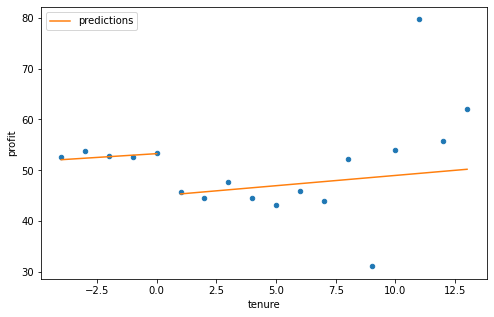

In [21]:
rdd_group_pred = (rdd_centered
                  .groupby("tenure")
                  [["profit","above_threshold"]]
                  .mean()
                  .reset_index())

rdd_group_pred["predictions"] = model.predict(rdd_group_pred)
                

ax = rdd_group_pred.plot.scatter(x="tenure", y="profit", color="C0")
rdd_group_pred.query("above_threshold<=0").plot(x="tenure", y="predictions", ax=ax, color="C1", figsize=(8,5))
rdd_group_pred.query("above_threshold>0").plot(x="tenure", y="predictions", ax=ax, color="C1", legend=False);

### Step 5

In [22]:
model = smf.wls("profit~tenure*above_threshold",
                weights=kernel(rdd_centered["tenure"], c=0, h=3),
               data=rdd_centered).fit()

model.summary().tables[1]

/home/nubank/anaconda3/envs/causal-glory/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:764: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,53.3467,0.620,86.063,0.000,52.132,54.562
tenure,0.4708,0.797,0.590,0.555,-1.092,2.034
above_threshold,-6.1449,1.826,-3.365,0.001,-9.724,-2.566
tenure:above_threshold,-1.8280,1.440,-1.269,0.204,-4.651,0.995


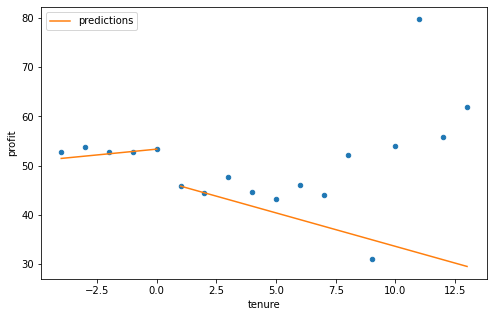

In [23]:
rdd_group_pred = (rdd_centered
                  .groupby("tenure")
                  [["profit","above_threshold"]]
                  .mean()
                  .reset_index())

rdd_group_pred["predictions"] = model.predict(rdd_group_pred)
                

ax = rdd_group_pred.plot.scatter(x="tenure", y="profit", color="C0")
rdd_group_pred.query("above_threshold<=0").plot(x="tenure", y="predictions", ax=ax, color="C1", figsize=(8,5))
rdd_group_pred.query("above_threshold>0").plot(x="tenure", y="predictions", ax=ax, color="C1", legend=False);

Playing with the width parameter of the kernel can change the regression line by a lot. The lower the width, the less we consider points far from the threshold. 